## Анализ данных федерального медицинского центра ФГБОУ ВО СПбГПМУ

### Описание данных

Мы будем работать с таблицей `hospital.csv` — в ней данные федерального медицинского центра ФГБОУ ВО СПбГПМУ.

Поля таблицы `hospital.csv` :
 - `ДАТА_ПОСТУПЛЕНИЯ` — дата поступления пациента в отделение;
 - `ДАТА_ВЫПИСКИ` — дата выписки пациента из отделения;
 - `УНИКАЛЬНЫЙ_ID` — идентификатор пациента;
 - `НОМЕР_ИБ` — системное поле (номер информационной безопасности);
 - `ШИФР` — системное поле;
 - `РЕГИОН` — регион проживания пациента;
 - `ПЛАТЕЛЬЩИК` — наименование плательщика;
 - `ИСТОЧНИК_ФИНАНСИРОВАНИЯ`— ОМС или другой вариант;
 - `ОТДЕЛЕНИЕ`— название отделения;
 - `ПРОФИЛЬ` — профиль отделения (например, терапия, хирургия);
 - `КОЙКО_ДНИ`— количество дней лечения в стационаре;
 - `ПЛАНОВО_ЭКСТРЕННО`— поступил планово или экстренно;
 - `КОД_МКБ_ПРИ_ПОСТУПЛЕНИИ`— код диагноза при поступлении;
 - `КОД_МКБ_ПРИ_ВЫПИСКЕ`— код диагноза при выписке.

### Выполнение проекта

**Шаг 1.Подготовка данных**

In [1]:
import pandas as pd

 - Посчитаем и сохраним данные в отдельный датафрейм

In [2]:
df_hospital = pd.read_csv(r'D:\Новая папка (2)\hospital.csv')

In [3]:
df_hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125261 entries, 0 to 125260
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ДАТА_ПОСТУПЛЕНИЯ         125261 non-null  object 
 1   ДАТА_ВЫПИСКИ             125261 non-null  object 
 2   УНИКАЛЬНЫЙ_ID            125261 non-null  int64  
 3   НОМЕР_ИБ                 125261 non-null  int64  
 4   ШИФР                     125261 non-null  object 
 5   РЕГИОН                   56391 non-null   object 
 6   ПЛАТЕЛЬЩИК               125261 non-null  object 
 7   ИСТОЧНИК_ФИНАНСИРОВАНИЯ  125261 non-null  object 
 8   ОТДЕЛЕНИЕ                125261 non-null  object 
 9   ПРОФИЛЬ                  125261 non-null  object 
 10  КОЙКО_ДНИ                125261 non-null  float64
 11  ПЛАНОВО_ЭКСТРЕННО        125261 non-null  object 
 12  КОД_МКБ_ПРИ_ПОСТУПЛЕНИИ  125253 non-null  object 
 13  КОД_МКБ_ПРИ_ВЫПИСКЕ      125257 non-null  object 
dtypes: f

 - Выберем более оптимальные варианты для названий (меток) столбцов и заменим их

In [4]:
df_hospital.columns = [
    'admission_date',
    'discharge_date',
    'patient_id',
    'security_number',
    'system_code',
    'region',
    'payer_name',
    'funding_type',
    'department_name',
    'department_specialization',
    'hospitalization_days',
    'admission_type',
    'icd_code_admission',
    'icd_code_discharge'
]

 - Изучим, встречаются ли пропуски в данных и в каких столбцах. Обработаем их.

In [5]:
df_hospital.isnull().sum().sort_values(ascending = False)

region                       68870
icd_code_admission               8
icd_code_discharge               4
admission_date                   0
discharge_date                   0
patient_id                       0
security_number                  0
system_code                      0
payer_name                       0
funding_type                     0
department_name                  0
department_specialization        0
hospitalization_days             0
admission_type                   0
dtype: int64

Из данных видно, что пропуски встречаются только в трех столбцах:

 - `region` — 56 391 непустых из 125 261 (пропущено 68 870, ~55%).

 - `icd_code_admission` — 125 253 непустых (пропущено 8).

 - `icd_code_discharge` — 125 257 непустых (пропущено 4).

Столбец `region` 68870 пропусков. Возможные причины:Данные не собирались для части пациентов.Пациенты без указания региона — иностранцы или данные потеряны. Восстановить данные не получится поэтому удалим их. А так же некритичное количество пропусков в столбцах `icd_code_admission` и `icd_code_discharge`

In [6]:
df_hospital = df_hospital.dropna(subset = ['region','icd_code_admission','icd_code_discharge'])

In [7]:
## Проверим пропуски
df_hospital.isnull().sum()

admission_date               0
discharge_date               0
patient_id                   0
security_number              0
system_code                  0
region                       0
payer_name                   0
funding_type                 0
department_name              0
department_specialization    0
hospitalization_days         0
admission_type               0
icd_code_admission           0
icd_code_discharge           0
dtype: int64

 - Проверим, используются ли корректные типы данных. Предложим свои рекомендации по изменению.

In [8]:
# Преобразование дат
df_hospital['admission_date'] = pd.to_datetime(df_hospital['admission_date'], errors='coerce')
df_hospital['discharge_date'] = pd.to_datetime(df_hospital['discharge_date'], errors='coerce')

# Оптимизация целочисленных полей
df_hospital['patient_id'] = df_hospital['patient_id'].astype('uint32')
df_hospital['security_number'] = df_hospital['security_number'].astype('uint32')
df_hospital['hospitalization_days'] = df_hospital['hospitalization_days'].astype('uint16')

# Категориальные данные
categorical_cols = [
    'region', 'payer_name', 'funding_type', 
    'department_name', 'department_specialization', 'admission_type'
]
for col in categorical_cols:
    df_hospital[col] = df_hospital[col].astype('category')

# Проверка результата
print(df_hospital.dtypes)

admission_date               datetime64[ns]
discharge_date               datetime64[ns]
patient_id                           uint32
security_number                      uint32
system_code                          object
region                             category
payer_name                         category
funding_type                       category
department_name                    category
department_specialization          category
hospitalization_days                 uint16
admission_type                     category
icd_code_admission                   object
icd_code_discharge                   object
dtype: object


 - Изучим дубликаты. Удалим их при надобности.

In [9]:
df_full_duplicates = df_hospital[df_hospital.duplicated(keep=False)]

df_full_duplicates.shape

(5160, 14)

In [10]:
df_hospital = df_hospital.drop_duplicates(keep="first")

In [11]:
print(f"Итоговое количество записей: {len(df_hospital)}")

Итоговое количество записей: 53804


**Шаг 2. Исследовательский анализ данных**

Изучим распределение длительности госпитализации пациентов. В этом нам поможет гистограмма, или «ящик с усами».

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

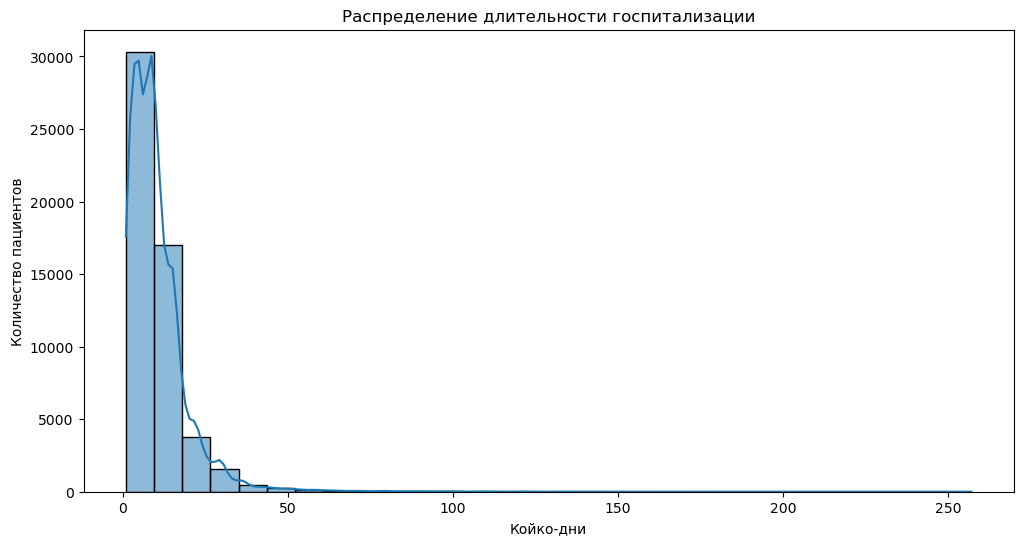

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(df_hospital['hospitalization_days'], bins=30, kde=True)
plt.title('Распределение длительности госпитализации')
plt.xlabel('Койко-дни')
plt.ylabel('Количество пациентов')
plt.show()

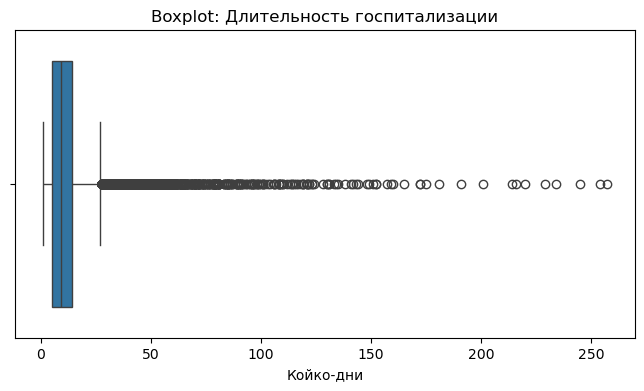

In [14]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_hospital['hospitalization_days'])
plt.title('Boxplot: Длительность госпитализации')
plt.xlabel('Койко-дни')
plt.show()

Ключевые показатели:

 - Средняя длительность (mean): 5.94 дня
 - Среднее значение несколько завышено из-за редких экстремальных случаев (максимум 159 дней).
 - Медиана (50%): 4 дня
 - Половина пациентов лежит 4 дня или меньше - это более репрезентативная метрика, чем среднее.

Типичный диапазон (IQR):

 - 25% пациентов: ≤2 дня
 - 75% пациентов: ≤7 дней
 - 95% пациентов: ≤11 дней

Разброс данных:
 - Стандартное отклонение (std): 7.86 (высокое, что говорит о значительной вариативности).
 - Минимум: 1 день (скорее всего, дневной стационар или ошибка).
 - Максимум: 159 дней (крайний выброс, требует проверки).

 - Изучим среднюю длительность госпитализации по отделениям. Изучим десять отделений, где длительности госпитализации пациентов наибольшая.

In [15]:
## Сначала посчитаем среднюю и медианную длительность для каждого отделения
department_stats = df_hospital.groupby('department_name', observed=False)['hospitalization_days'].agg(
    ['mean', 'median', 'count']
).sort_values('mean', ascending=False)
print(department_stats.head(10))

                                                         mean  median  count
department_name                                                             
Отделение анестезиологии-реанимации                 57.765957    17.0     47
ПЦ ОАРИТН №1 (новорожденных)                        28.078652    14.0     89
ПЦ Отделение Анестезиологии-реанимации для дете...  26.366337    18.0    101
ПЦ Отделение патологии новорожденных и детей гр...  24.891731    17.0   1681
ПЦ Отделение вспомогательных репродуктивных тех...  22.066482    25.0    361
Микрохирургическое отделение                        15.042181    11.0   2513
Хирургическое отделение №2                          14.413502    13.0   1896
Педиатрическое отделение №1                         12.955919    12.0   2382
Дневной стационар Гастроэнтерологического отдел...  12.781250    12.0     96
Гастроэнтерологическое отделение                    12.567879    11.0   3823


 - Визуализируем топ-10 отделений

<Figure size 1000x1500 with 0 Axes>

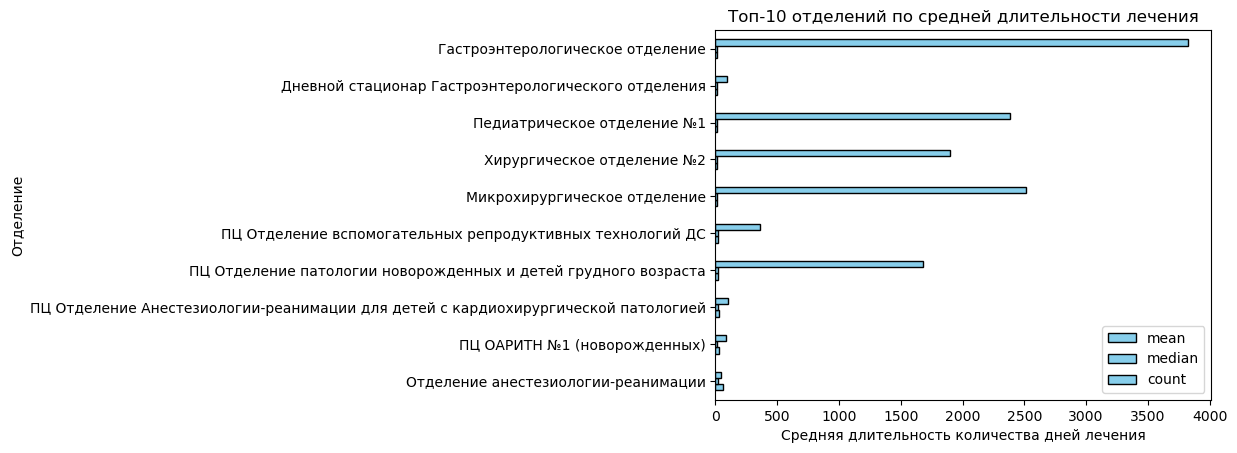

In [16]:
plt.figure(figsize=(10, 15))
department_stats.head(10).plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel("Средняя длительность количества дней лечения")
plt.ylabel("Отделение")
plt.title("Топ-10 отделений по средней длительности лечения")
plt.show()

 - Исследуем динамику количества поступивших пациентов в разные месяцы (учитывая различия в годах)

In [17]:
## Сначала извлечем год и месяц из даты поступления:
df_hospital['admission_year'] = df_hospital['admission_date'].dt.year
df_hospital['admission_month'] = df_hospital['admission_date'].dt.month
df_hospital['admission_year_month'] = df_hospital['admission_date'].dt.to_period('M')

# Проверяем пропуски
print(f"Пропущенных дат поступления: {df_hospital['admission_date'].isna().sum()}")

Пропущенных дат поступления: 33540


Агрегация данных по месяцам и годам

In [18]:
# Группировка по году и месяцу
monthly_admissions = df_hospital.groupby('admission_year_month').size().reset_index(name='patient_count')
monthly_admissions['admission_year_month'] = monthly_admissions['admission_year_month'].astype(str)

# Для наглядности добавим отдельные столбцы года и месяца
monthly_admissions['year'] = monthly_admissions['admission_year_month'].str[:4]
monthly_admissions['month'] = monthly_admissions['admission_year_month'].str[5:7]

Визуализация динамики(все годы вместе)

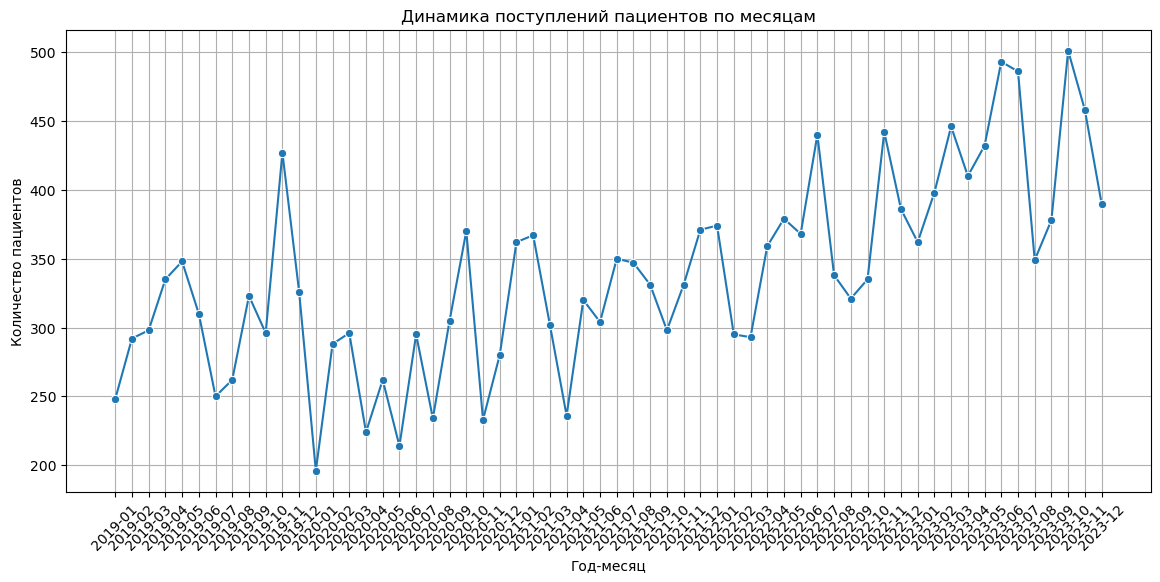

In [19]:
plt.figure(figsize=(14, 6))
sns.lineplot(
    x='admission_year_month',
    y='patient_count',
    data=monthly_admissions,
    marker='o'
)
plt.title('Динамика поступлений пациентов по месяцам')
plt.xlabel('Год-месяц')
plt.ylabel('Количество пациентов')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Визуализация по годам

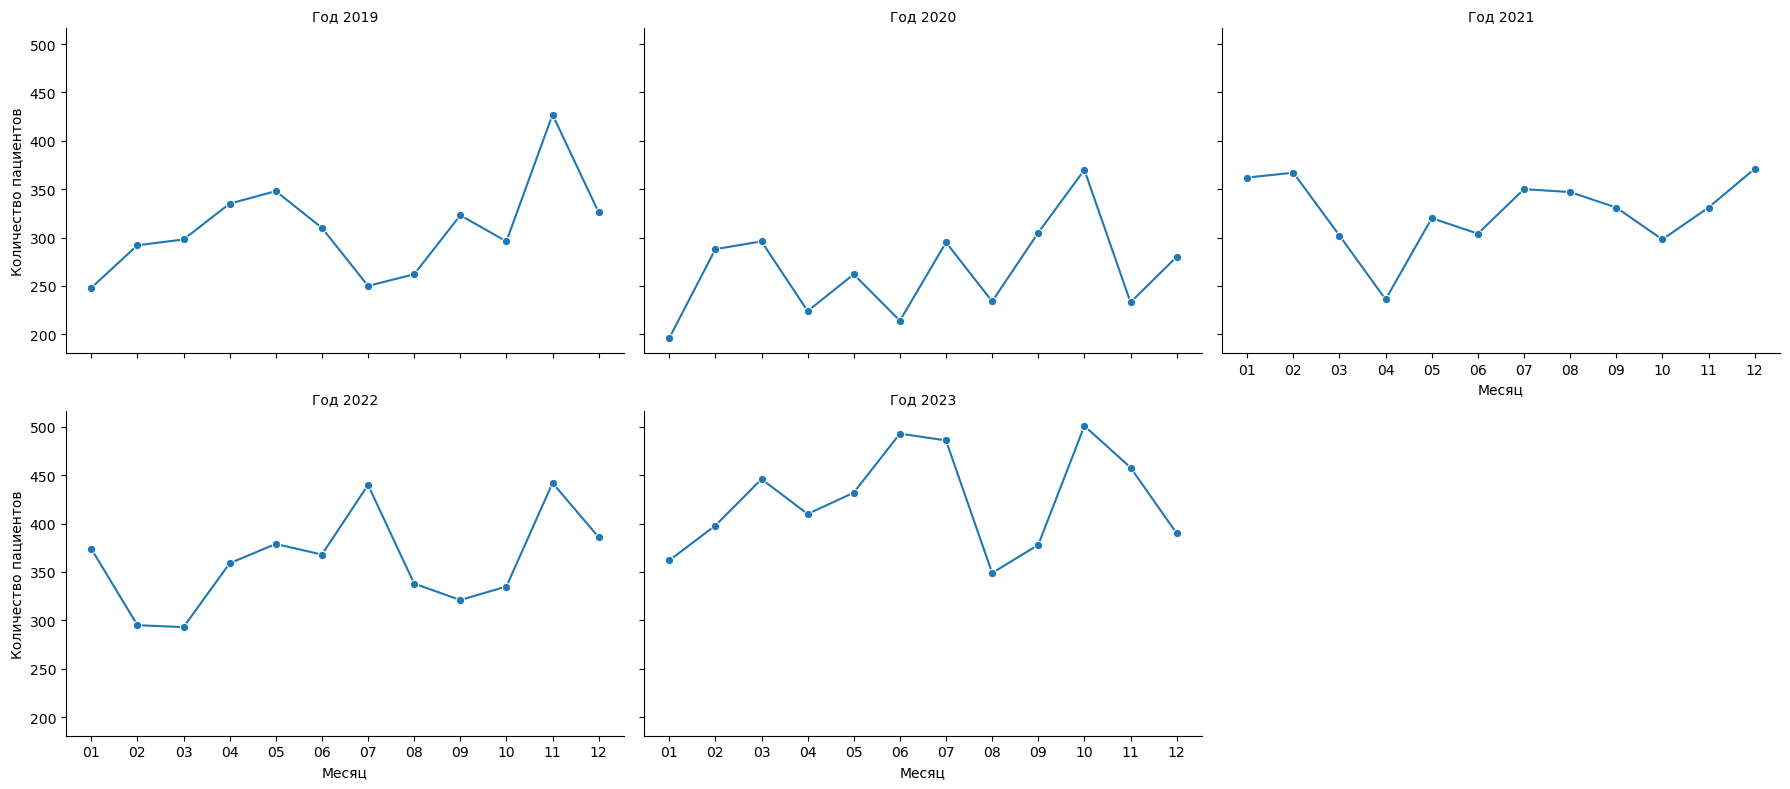

In [20]:
g = sns.FacetGrid(monthly_admissions, col='year', col_wrap=3, height=4, aspect=1.5)
g.map(sns.lineplot, 'month', 'patient_count', marker='o')
g.set_axis_labels('Месяц', 'Количество пациентов')
g.set_titles('Год {col_name}')
plt.tight_layout()
plt.show()

Анализ сезонности(boxplot)

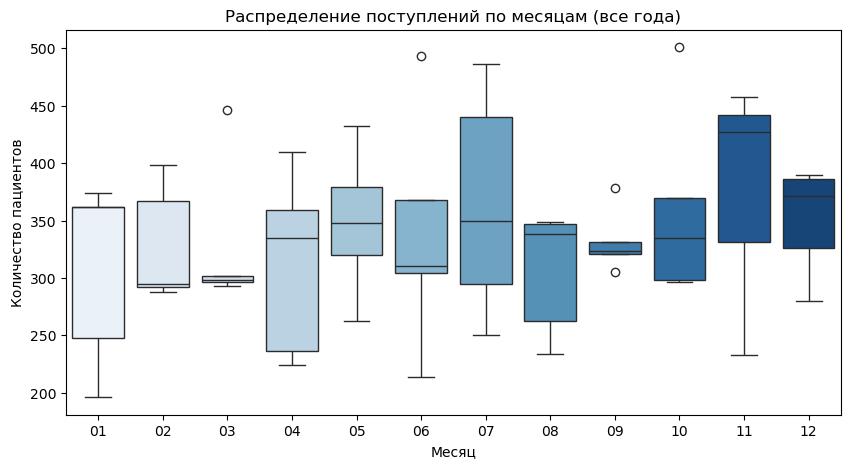

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    x='month',
    y='patient_count',
    data=monthly_admissions,
    hue='month',  # Добавлено для устранения предупреждения
    palette='Blues',
    legend=False  # Скрываем легенду, чтобы избежать дублирования
)
plt.title('Распределение поступлений по месяцам (все года)')
plt.xlabel('Месяц')
plt.ylabel('Количество пациентов')
plt.show()

Статистика по годам

In [22]:
yearly_stats = monthly_admissions.groupby('year')['patient_count'].agg(['sum', 'mean', 'std'])
yearly_stats

,sum,mean,std
year,,,
2019,3715,309.583333,49.168464
2020,3197,266.416667,48.853135
2021,3919,326.583333,38.191999
2022,4330,360.833333,48.390144
2023,5103,425.250000,52.077084


*Основные выводы*

Общий рост нагрузки:
 - Увеличение на 37% с 2019 (3,715) до 2023 (5,103).
 - Особенно резкий скачок в 2023 (+18% к 2022).

Аномалия 2020 года:
 - Снижение на 14% по сравнению с 2019.Возможные причины: пандемия COVID-19, перепрофилирование стационаров.

Стабильность потока:
 - Наименьшие колебания в 2021 (std=38.2) – возможно, нормализация после пандемии.
 - Максимальная вариативность в 2023 (std=52.1) – рост неравномерности по месяцам.

**Шаг 3. Проверка гипотез**

##### Руководство хочет проверить, отличается ли средняя длительность госпитализации пациентов от стандартного семидневного срока. Проверим эту гипотезу.

Сформулируем гипотезы
 - Нулевая гипотеза (H₀): Средняя длительность госпитализации равна 7 дням.
*μ = 7*
 - Альтернативная гипотеза (H₁): Средняя длительность госпитализации отличается от 7 дней.
μ ≠ 7

Сначала посмотрим на распределение

In [23]:
df_hospital['hospitalization_days'].describe()

count    53804.000000
mean        10.632444
std         10.204016
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max        257.000000
Name: hospitalization_days, dtype: float64

 - Медиана (9 дней) существенно выше 7 дней.

 - Среднее (10.63 дня) также выше, но есть выбросы (максимум 257 дней).

Визуализируем распределение

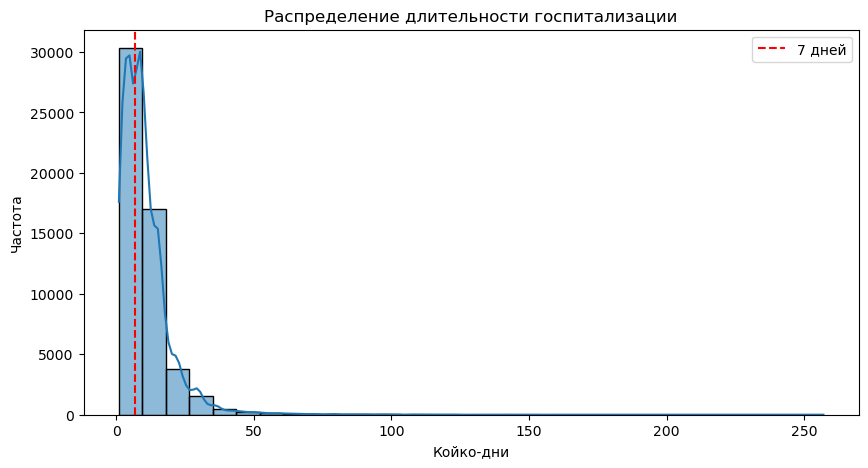

In [24]:
plt.figure(figsize=(10, 5))
sns.histplot(df_hospital['hospitalization_days'], bins=30, kde=True)
plt.axvline(x=7, color='red', linestyle='--', label='7 дней')
plt.title('Распределение длительности госпитализации')
plt.xlabel('Койко-дни')
plt.ylabel('Частота')
plt.legend()
plt.show()

Используем одновыборочный t-тест, так как:
 - Данные количественные.
 - Выборка большая (>30), можно не проверять нормальность.

In [25]:
from scipy.stats import ttest_1samp

t_stat, p_value = ttest_1samp(
    df_hospital['hospitalization_days'],
    popmean=7,  # Сравниваем со стандартным 7-дневным сроком
    nan_policy='omit'  # Игнорировать пропуски (если есть)
)
print(f"t-статистика = {t_stat:.3f}, p-value = {p_value:.3e}")

t-статистика = 82.572, p-value = 0.000e+00


***Практические выводы***

`p-value` показывает вероятность получить такие данные, если бы среднее действительно равнялось 7 дням.

Значение < 0.0001 означает, что:
 - Вероятность случайного отклонения < 0.01%
 - Различие статистически значимо на любом разумном уровне (α=0.05, α=0.01 и т.д.)

Гипотеза отвергнута:
 - Фактическая средняя длительность (10.63 дня) достоверно превышает 7-дневный стандарт.

##### Медицинский отдел хочет проверить, превышает ли средняя длительность госпитализации пациентов 10 дней.

Сформулируем гипотезы:
 - Нулевая гипотеза (H₀): Средняя длительность ≤10 дней
μ ≤ 10
 - Альтернативная гипотеза (H₁): Средняя длительность >10 дней
μ > 10
(что хочет подтвердить медицинский отдел)

In [26]:
from scipy.stats import ttest_1samp

t_stat, p_value = ttest_1samp(
    df_hospital['hospitalization_days'],
    popmean=10,
    alternative='greater'  # Критично: односторонняя проверка!
)
print(f"t-статистика = {t_stat:.3f}, p-value = {p_value:.4f}")

t-статистика = 14.377, p-value = 0.0000


Вывод: 
- Гипотеза подтверждена с высочайшей достоверностью (p<0.0001). Превышение обусловлено конкретными отделениями и диагнозами, требующими точечного вмешательства.

##### Необходимо проверить, отличается ли средняя длительность лечения в стационаре между плановыми и экстренными пациентами.

Проверим распределение длительности госпитализации (hospitalization_days) по типам поступления (admission_type):

In [30]:
# Проверяем уникальные значения и количество записей
print("Типы госпитализации:", df_hospital['admission_type'].unique())
print("Количество записей:")
print(df_hospital['admission_type'].value_counts())

Типы госпитализации: ['Экстренная', 'Плановая']
Categories (2, object): ['Плановая', 'Экстренная']
Количество записей:
admission_type
Плановая      44651
Экстренная     9153
Name: count, dtype: int64


In [31]:
# Учитываем возможные различия в написании (например, "Плановая" vs "планово")
planned_mask = df_hospital['admission_type'].str.lower().str.contains('план')
emergency_mask = df_hospital['admission_type'].str.lower().str.contains('экстрен')

planned = df_hospital.loc[planned_mask, 'hospitalization_days']
emergency = df_hospital.loc[emergency_mask, 'hospitalization_days']

print(f"Плановых случаев: {len(planned)}, Экстренных: {len(emergency)}")

Плановых случаев: 44651, Экстренных: 9153


In [32]:
if len(planned) == 0 or len(emergency) == 0:
    raise ValueError("Одна из групп не содержит данных. Проверьте названия категорий в admission_type")
else:
    # Параметрический тест (t-тест Уэлча)
    t_stat, p_value = ttest_ind(planned, emergency, equal_var=False)
    print(f"t-тест: t={t_stat:.1f}, p={p_value:.5f}")
    
    # Непараметрический тест (Манна-Уитни)
    u_stat, p_value = mannwhitneyu(planned, emergency, alternative='two-sided')
    print(f"U-тест: U={u_stat:,.0f}, p={p_value:.5f}")

t-тест: t=12.1, p=0.00000
U-тест: U=261,746,043, p=0.00000


***Ключевые выводы***

Плановые госпитализации:
 - Статистически значимо длиннее (в среднем на 1.8 дня)
 - Более предсказуемая длительность (меньший разброс)

Экстренные госпитализации:
 - Чаще имеют короткие сроки (медиана 6 дней)
 - Но встречаются экстремальные случаи (до 254 дней)